In [4]:
%pylab inline
import numpy as np
from astropy.table import Table, Column
from scipy.optimize import curve_fit
from IPython.display import display, Math, Latex
from scipy.integrate import odeint
plt.style.use('seaborn-whitegrid')

Populating the interactive namespace from numpy and matplotlib


##### 1. If we lived in a Olberian universe
##### (a) calculate the distance at which any random line-of-sight will intersect the surface of a star (this is referred to as the point at which the optical depth of uniformly distributed stars is unity)

##### Assume all the stars have the same luminosity as the Sun, the average number density of stars is $10^{9} \: Mpc^{-3}$, and the radius of the stars is $7x10^{8}m$.

In an Olberian Universe no stars block any other stars, and the universe is infinite in age. We can find the distance that any random line-of-sight will intersect with a star by calculating the mean free path, as described by

$$ d = \frac{1}{n_{stars}\sigma_{\star}} $$

where $n_{stars}$ is the average number density of the stars and $\sigma_{\star}$ is the angular area of the mean star. Putting this in terms of the radius

$$ d = \frac{1}{n_{stars}\pi(r_{\star})^{2}} $$

using n_{stars} = $10^{9} \:Mpc^{-3}$ and $r_{\star} = 2.269x10^{-14} \:Mpc$

$$ d = \frac{1}{(10^9)(\pi)(2.269x10^{-14})^{2}} \: Mpc = 6.183x10^{17} \:Mpc$$

##### 2. When Edwin Hubble measured the expansion rate of the universe he derived a Hubble’s constant of 500 $\frac{km}{Mpc\:s}$. To get this value of $H_{o}$ how incorrect were his estimates of the distances to Cepheid stars? How does his value of the universe change the age of the universe and would we need to live in an accelerating or decelerating universe in order to reconcile the Hubble time with the current age of the universe (13.7 Gyr). Remember to explain your answers.

To measure the distances to Cepheid stars with the Hubble constant we can use  $\:v_{Cepheid} = H_{o}d$

In our universe, this velocity is invariable but based on varying values for Hubble's constant, the distance will change. Thus we can equate the velocity with our current known value versus his:

$$H_{o\:hubble}\:d_{hubble} = H_{o\:current}\:d_{current} \:\rightarrow \:d_{hubble} = \frac{H_{o\:current}}{H_{o\:hubble}}\:d_{current} \:\rightarrow \:d_{hubble} = \frac{70}{500}\:d_{current} \:\rightarrow \:d_{hubble} = 0.14\:d_{current}$$

His values for distances must have been 0.14 of the currently determined distances.

To determine the approximate age of the universe we can use the fact that the Hubble time $t_{o} = H_{o}^{-1}$ and use Hubble's value for $H_{o}$:

$$t_{o} = \frac{1}{500} \:\frac{km}{Mpc \:s} \:\rightarrow t_{o} = \frac{1}{1.62x10^{-17}} \:s \:\rightarrow t_{o} = 6.17x10^{16} \:s \:\rightarrow t_{o} = 1.95x10^{9} \:yr = 1.95 \:Gyr$$

This is approximately 0.14 the age of the universe we estimate now. In order to reconcile this with the current age of the universe, the universe would have to be deaccelerating. We can see this easily by looking at the Hubble time from our value for $H_{o}$, which is about 14.4 Gyr, an overestimate in a universe we know is accelerating. To calculate an underestime in the age of the universe implies to opposite, deacceleration.

##### 3. Ryden Problem 3.2: Suppose you are a two-dimensional being, living on the surface of a sphere with radius R. An object of width ds ≪ R is at a distance r from you (remember, all distances are measured on the surface of the sphere). What angular width dθ will you measure for the object? Explain the behavior of dθ as r → πR.

The proper metric $ds^{2}$ for a positively curved surface like a sphere with radius $R$ between two points in $(r,\theta)$ with separation $(dr, d\theta)$ is:

$$ds^{2} = dr^{2} + R^{2}sin^{2}(\frac{r}{R})d\theta^{2} $$

Solving for $d\theta$:

$$ds^{2} - dr^{2} = R^{2}sin^{2}(\frac{r}{R})d\theta^{2} \:\rightarrow\: d\theta^{2} = \frac{ds^{2} - dr^{2}}{R^{2}sin^{2}(\frac{r}{R})} \:\rightarrow\: d\theta = \sqrt{\frac{ds^{2} - dr^{2}}{R^{2}sin^{2}(\frac{r}{R})}}$$

For a this surface, Ryden details that $r = \pi R$ is the antipodal distance, that is, the distance at maximum possible separation, or infinity. We see this to be true from evaluating $d\theta$ when $r \rightarrow \pi R$:

$$d\theta = \sqrt{\frac{ds^{2} - dr^{2}}{R^{2}sin^{2}(\frac{r}{R})}}; r = \pi R \:\rightarrow\:  d\theta = \sqrt{\frac{ds^{2} - dr^{2}}{R^{2}sin^{2}(\frac{\pi R}{R})}} \:\rightarrow\:  d\theta = \sqrt{\frac{ds^{2} - dr^{2}}{R^{2}sin^{2}(\pi)}} \:\rightarrow\:  d\theta = \sqrt{\frac{ds^{2} - dr^{2}}{R^{2}(0)}} \:\rightarrow\:  d\theta = \infty$$

##### 4. Using Python solve the following equation numerically and plot a(t) vs t. Note “.” represents the time derivative,
$$\dot{a}(t)^{2} = H_{0}^{2}a(t)^{-3}$$
##### where $H_{o}$ is the Hubble constant ($H_{o} = 70 \frac{km}{Mpc\:s}$)
##### Solve the integration algebraically and overlay the solution on your plot.

If we define $\dot{a}$ as a function, we can numerically solve using the Python function odeint. Taking the square root of both sides we see that $\dot{a} = H_{o}a(t)^{-3/2}$. Writing a quick function for this in the next cell:

In [13]:
h = 70
def a_dot(a,t):
    return h*a**-1.5

t = np.linspace(0,1000,100)

a_t = odeint(a_dot, 1, t)

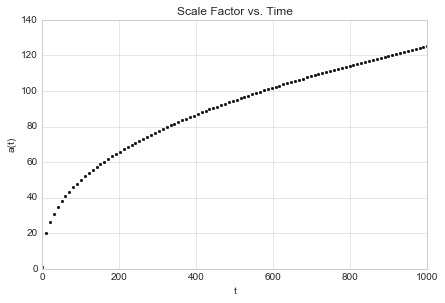

In [15]:
fig,ax = subplots(1,1)
fig.tight_layout()

ax.set_title("Scale Factor vs. Time")
ax.set_xlabel("t")
ax.set_ylabel("a(t)")

ax.plot(t,a_t,linestyle="none",marker=".", markersize=5,color="k")

Solving algebraically

$$\dot{a}(t)^{2} = H_{0}^{2}a(t)^{-3} \:\rightarrow \: \dot{a}(t) = H_{0}a(t)^{-3/2} \:\rightarrow\: \frac{da(t)}{dt} = H_{0}a(t)^{-3/2} \:\rightarrow\: a^{3/2}da = H_{o}dt$$

$$\int_{o}^{a} a^{3/2}da = \int_{o}^{t} H_{o}dt \:\rightarrow\: \frac{2}{5}a^{5/2} \mid_{0}^{a} \:= H_{0}t \:\mid_{o}^{t} \:\rightarrow\: a(t) = (\frac{5}{2}H_{o}t)^{2/5}$$

Plotting this (red) along with the numerical solution (black):

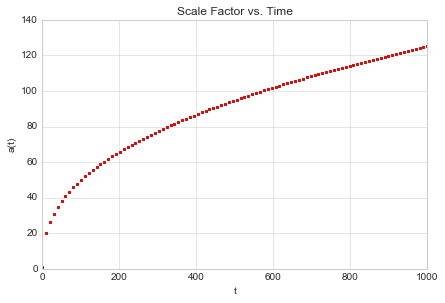

In [19]:
def a(t):
    return (2.5*h*t)**0.4

fig,ax = subplots(1,1)
fig.tight_layout()

ax.set_title("Scale Factor vs. Time")
ax.set_xlabel("t")
ax.set_ylabel("a(t)")

ax.plot(t,a_t,linestyle="none",marker=".", markersize=5,color="k")
ax.plot(t,a(t),linestyle="none",marker=".", markersize=5,color="r")

Clearly these are quite similar, we can see the near perfect overlap.